In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_csv(r"C:\Users\USER\Downloads\ML TASK\travel_dataset.csv")

In [67]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [38]:
data.shape

(4888, 20)

In [39]:
data.size

97760

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [41]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [42]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

In [44]:
#Iterative Imputer for continuous correlated columns ----
iter_imp = IterativeImputer(random_state=42)
data[['Age', 'DurationOfPitch', 'NumberOfTrips']] = iter_imp.fit_transform(
    data[['Age', 'DurationOfPitch', 'NumberOfTrips']]
)


In [45]:
#KNN Imputer for MonthlyIncome (nonlinear correlations) ----
knn_imp = KNNImputer(n_neighbors=5)
data[['MonthlyIncome']] = knn_imp.fit_transform(data[['MonthlyIncome']])


In [46]:
#Mode Imputer for discrete columns ----
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0], inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0], inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0], inplace=True)

In [47]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### Univariate Analysis

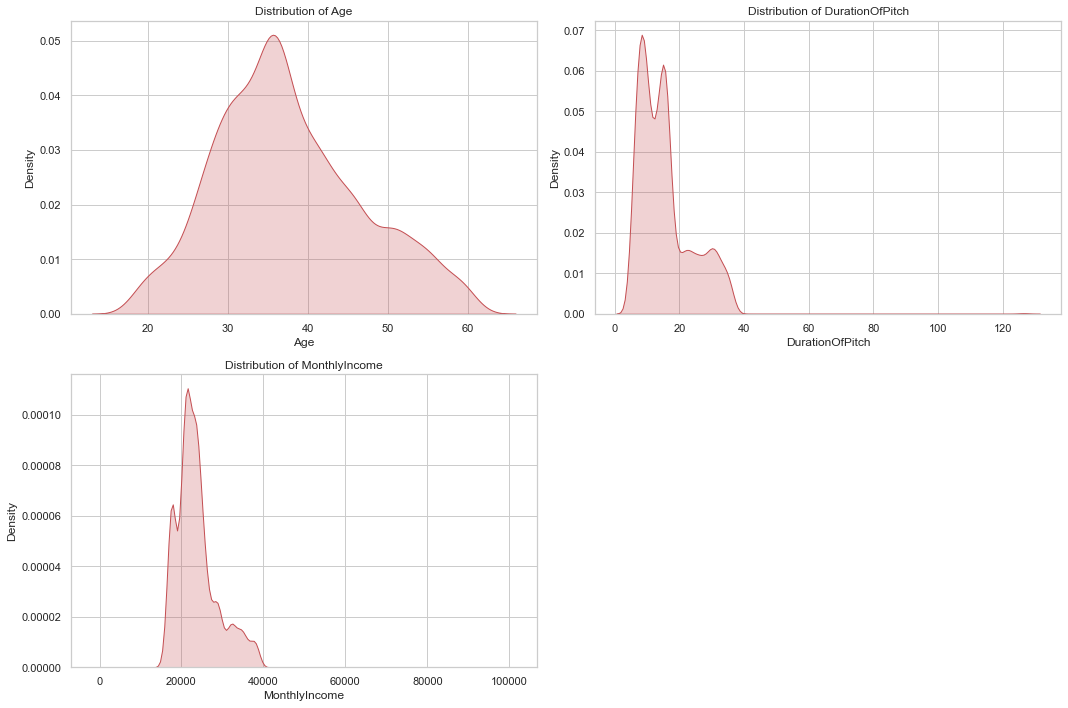

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the variable name matches your DataFrame
continuous_feature = data[['Age', 'DurationOfPitch',  'MonthlyIncome']]

plt.figure(figsize=(15, 10))

# Loop through each numerical column
for i in range(len(continuous_feature.columns)):
    plt.subplot(2, 2, i+1)  # 2x2 grid for 4 features
    sns.kdeplot(x=data[continuous_feature.columns[i]], shade=True, color='r')
    plt.xlabel(continuous_feature.columns[i])
    plt.ylabel('Density')
    plt.title(f'Distribution of {continuous_feature.columns[i]}')

plt.tight_layout()
plt.show()


In [49]:
#WITH OUTLIERS

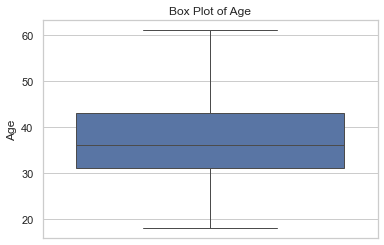

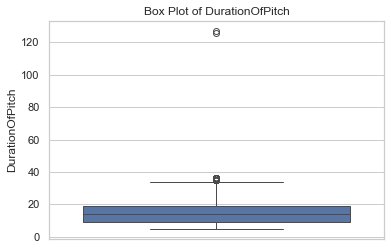

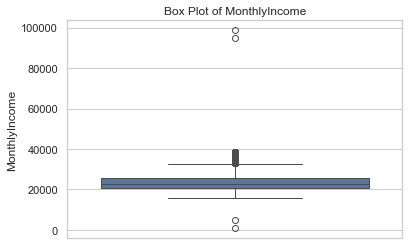

In [50]:
# Create boxplots for each numeric column
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

num_cols = ['Age', 'DurationOfPitch', 'MonthlyIncome']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


DurationOfPitch: Removed 2.29% outliers
MonthlyIncome: Removed 9.84% outliers


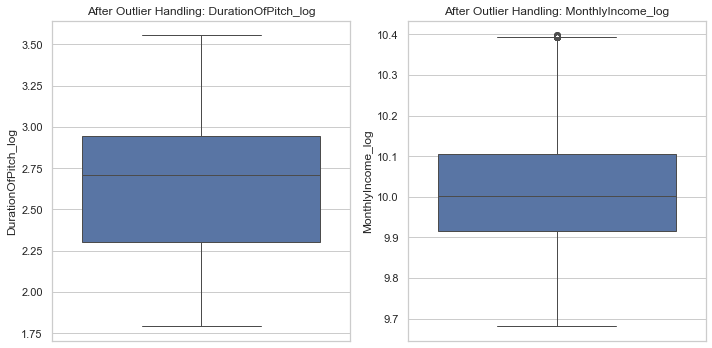

In [51]:
# Columns to process
num_cols = [ 'DurationOfPitch', 'MonthlyIncome']
clean_data = data.copy()

# Step 1: Outlier Removal using IQR
for col in num_cols:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    print(f"{col}: Removed {(len(data) - len(clean_data)) / len(data) * 100:.2f}% outliers")

# Step 2: Apply Log Transform to skewed columns
clean_data['DurationOfPitch_log'] = np.log1p(clean_data['DurationOfPitch'])
clean_data['MonthlyIncome_log'] = np.log1p(clean_data['MonthlyIncome'])

# Drop original skewed columns
clean_data.drop(['DurationOfPitch', 'MonthlyIncome'], axis=1, inplace=True)

# Step 3: Plot Boxplots after transformation
plot_cols = [ 'DurationOfPitch_log', 'MonthlyIncome_log']

plt.figure(figsize=(15, 5))
for i, col in enumerate(plot_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=clean_data[col])
    plt.title(f'After Outlier Handling: {col}')
plt.tight_layout()
plt.show()


In [52]:
clean_data.shape

(4407, 20)

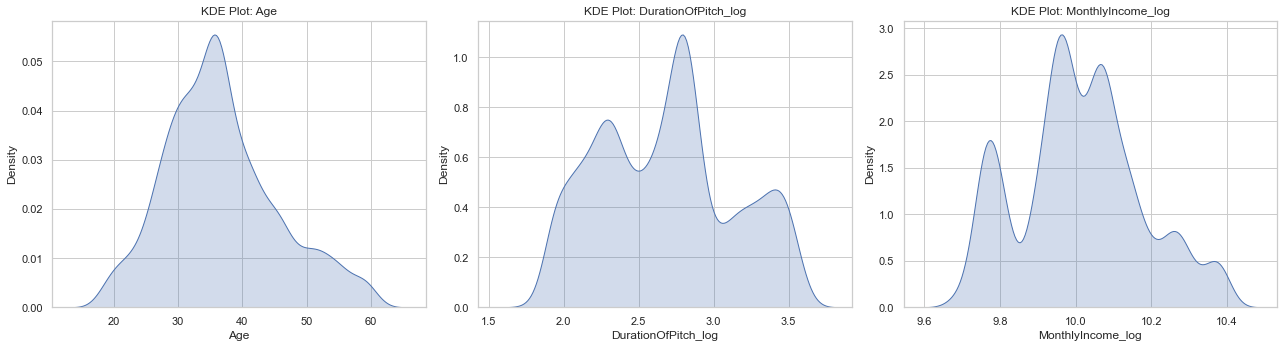

In [53]:
kde_cols = ['Age', 'DurationOfPitch_log', 'MonthlyIncome_log']

plt.figure(figsize=(18, 5))
for i, col in enumerate(kde_cols):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(x=clean_data[col], fill=True)
    plt.title(f'KDE Plot: {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [54]:
clean_data.describe()

,CustomerID,ProdTaken,Age,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,DurationOfPitch_log,MonthlyIncome_log
count,4407.00000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,202401.83322,0.194917,36.656558,1.665305,2.890175,3.690265,3.582256,3.209440,0.296120,3.061266,0.611754,1.167461,2.678624,10.010818
std,1409.11409,0.396182,8.764460,0.921736,0.725147,1.004101,0.797171,1.847554,0.456596,1.364342,0.487406,0.855997,0.449948,0.161745
min,200000.00000,0.000000,18.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.791759,9.680969
25%,201183.50000,0.000000,31.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,2.302585,9.914872
50%,202358.00000,0.000000,36.000000,1.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.708050,10.001340
75%,203633.50000,0.000000,42.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.944439,10.106061
max,204887.00000,1.000000,61.000000,3.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,3.555348,10.397574


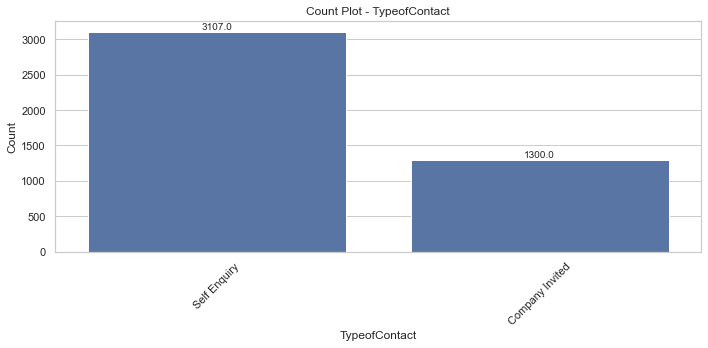

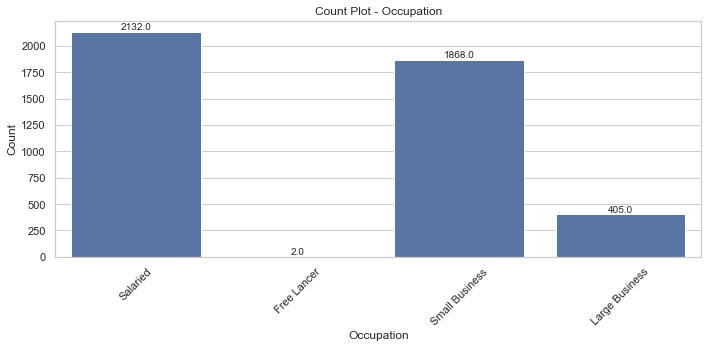

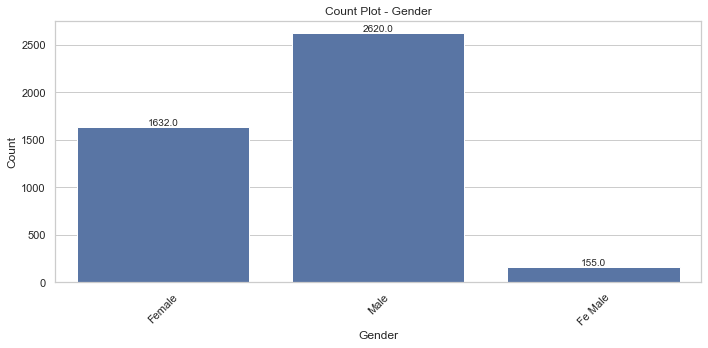

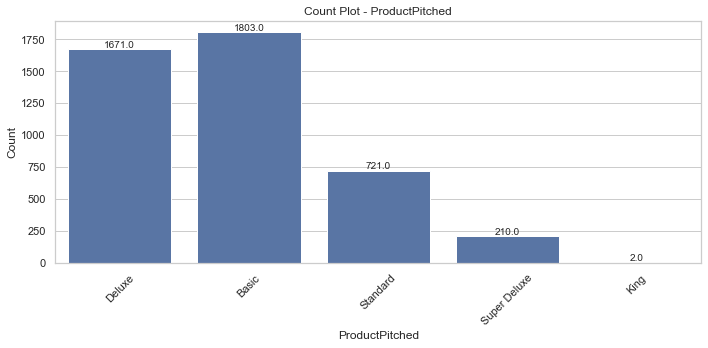

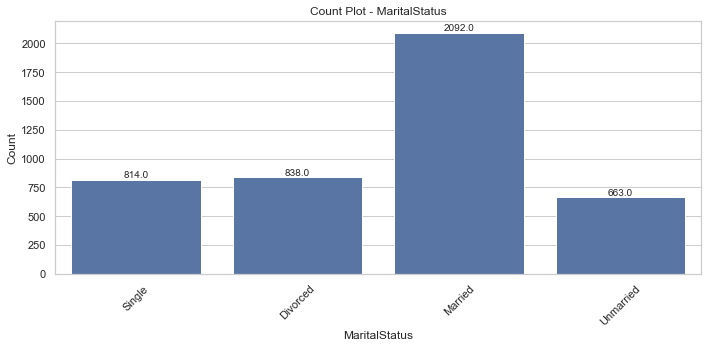

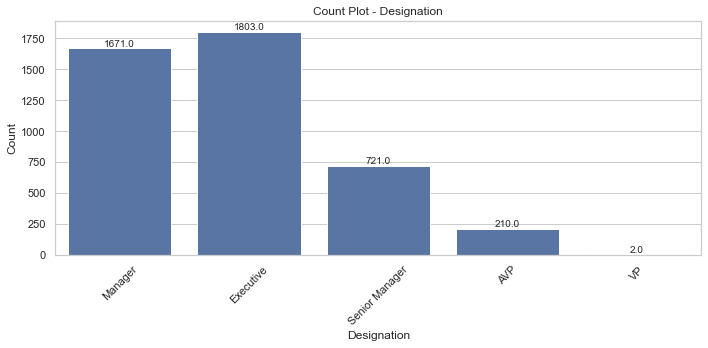

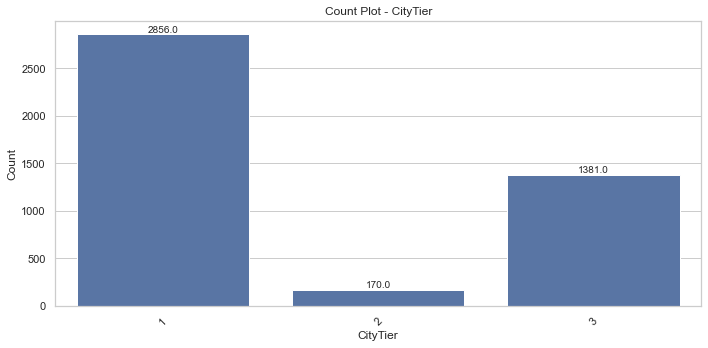

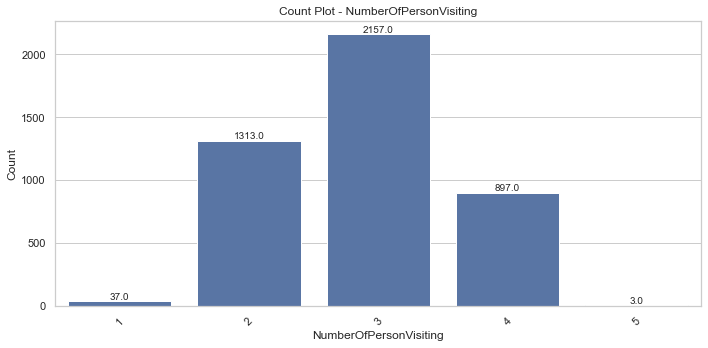

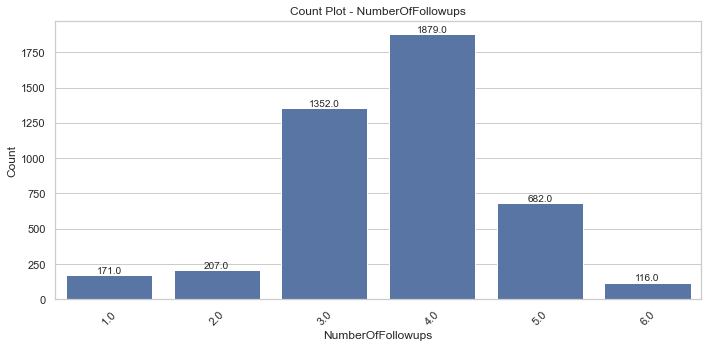

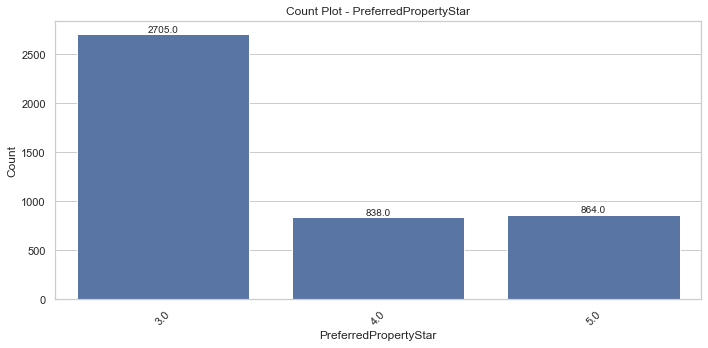

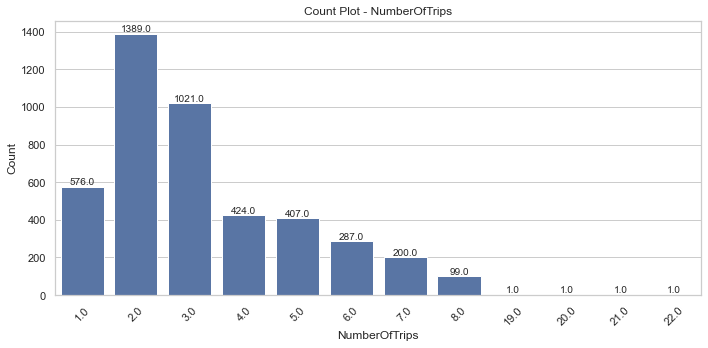

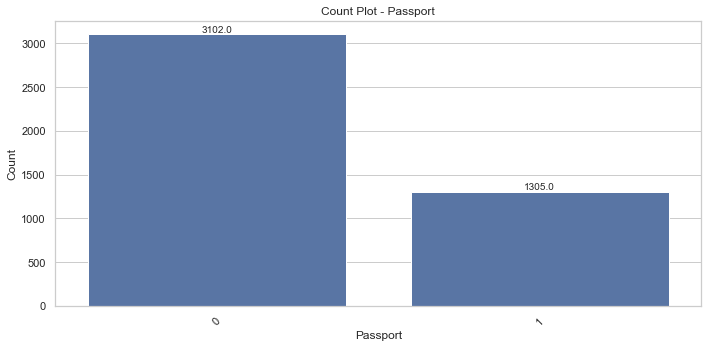

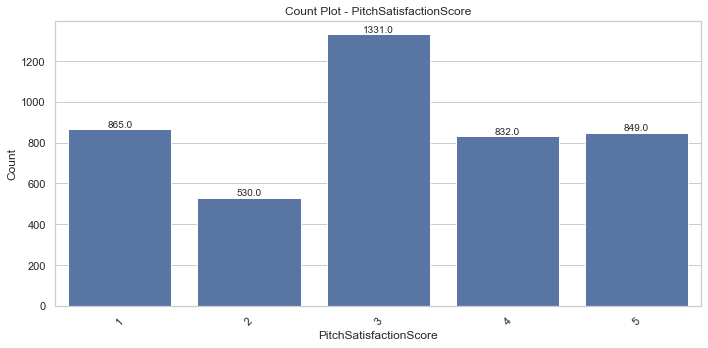

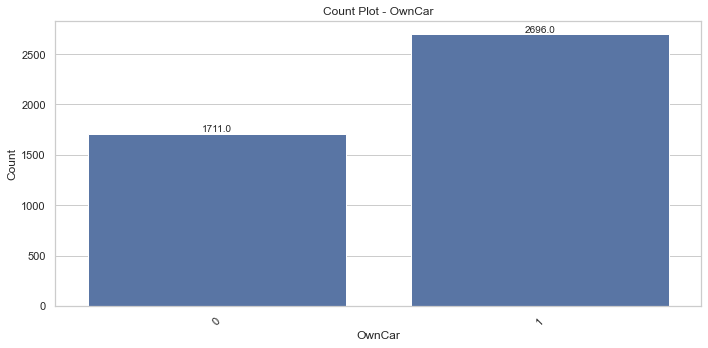

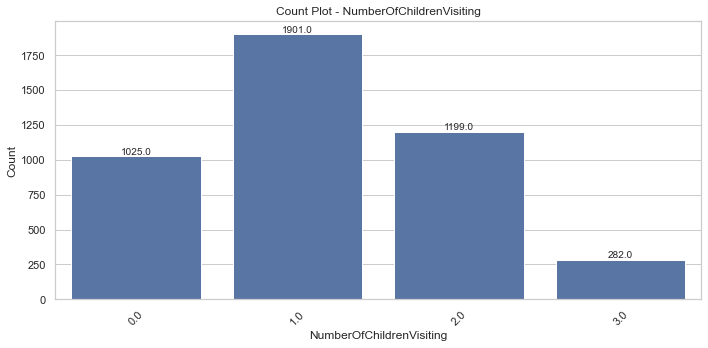

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns from clean dataset
cat_cols = [
    'TypeofContact',
    'Occupation',
    'Gender',
    'ProductPitched',
    'MaritalStatus',
    'Designation',
    'CityTier',
    'NumberOfPersonVisiting',
    'NumberOfFollowups',
    'PreferredPropertyStar',
    'NumberOfTrips',
    'Passport',
    'PitchSatisfactionScore',
    'OwnCar',
    'NumberOfChildrenVisiting'
]

# Univariate Categorical Plots with Value Counts on Bars
for col in cat_cols:
    plt.figure(figsize=(10,5))
    
    ax = sns.countplot(data=clean_data, x=col)
    plt.title(f"Count Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Add value labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


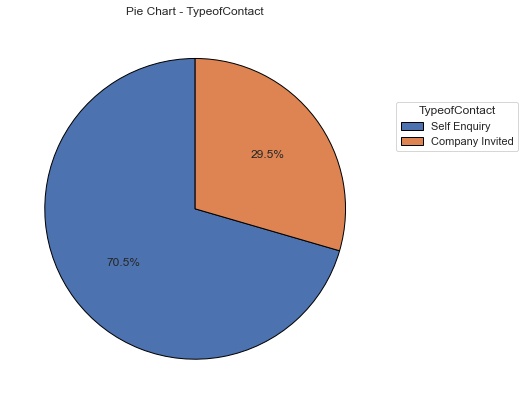


Value Counts for TypeofContact:
 TypeofContact
Self Enquiry       3107
Company Invited    1300
Name: count, dtype: int64
--------------------------------------------------


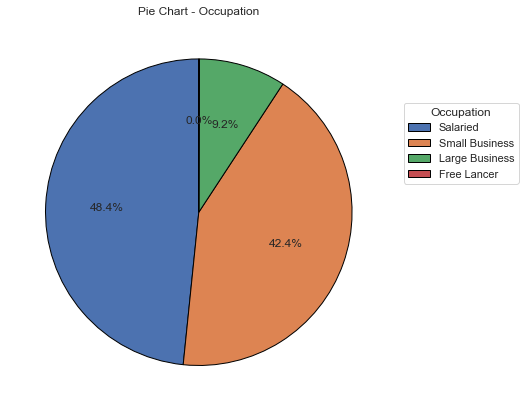


Value Counts for Occupation:
 Occupation
Salaried          2132
Small Business    1868
Large Business     405
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------------


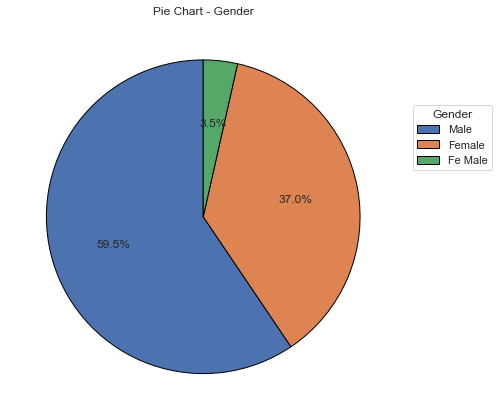


Value Counts for Gender:
 Gender
Male       2620
Female     1632
Fe Male     155
Name: count, dtype: int64
--------------------------------------------------


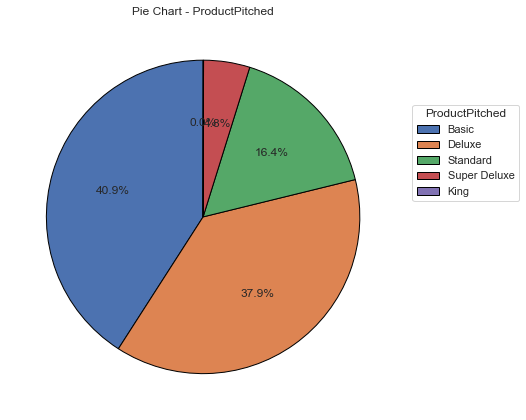


Value Counts for ProductPitched:
 ProductPitched
Basic           1803
Deluxe          1671
Standard         721
Super Deluxe     210
King               2
Name: count, dtype: int64
--------------------------------------------------


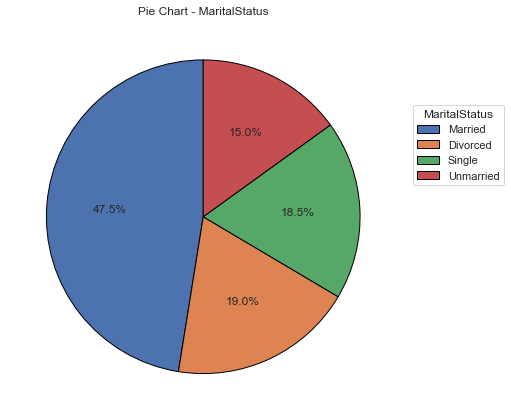


Value Counts for MaritalStatus:
 MaritalStatus
Married      2092
Divorced      838
Single        814
Unmarried     663
Name: count, dtype: int64
--------------------------------------------------


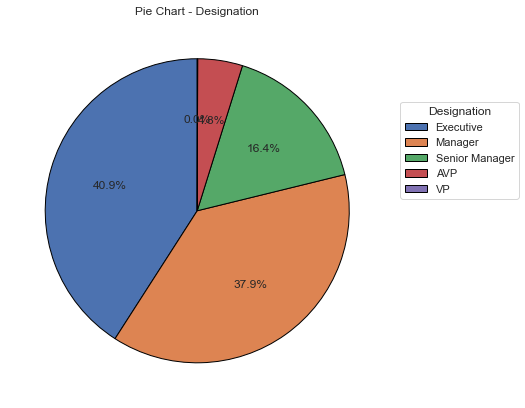


Value Counts for Designation:
 Designation
Executive         1803
Manager           1671
Senior Manager     721
AVP                210
VP                   2
Name: count, dtype: int64
--------------------------------------------------


In [56]:
import matplotlib.pyplot as plt

cat_cols = clean_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(7, 6))
    counts = clean_data[col].value_counts()

    # Pie chart without text on slices
    plt.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    
    plt.title(f"Pie Chart - {col}")

    # Legend to show category labels
    plt.legend(counts.index, title=col, bbox_to_anchor=(1.02, 0.8), loc='upper left')

    plt.tight_layout()
    plt.show()

    print(f"\nValue Counts for {col}:\n", counts)
    print("-" * 50)


### Bivariate Analysis

In [57]:
num_continuous = ['Age', 'DurationOfPitch_log', 'MonthlyIncome_log', 'NumberOfTrips']


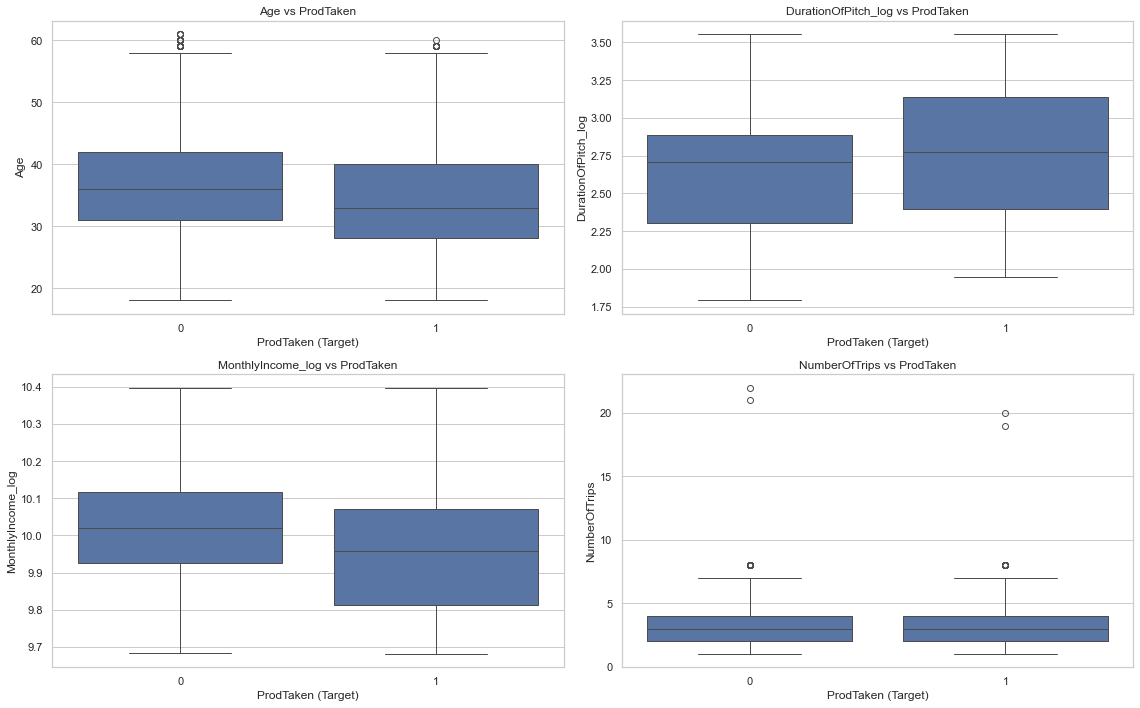

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

for i, col in enumerate(num_continuous):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='ProdTaken', y=clean_data[col], data=clean_data)
    plt.title(f'{col} vs ProdTaken')
    plt.xlabel("ProdTaken (Target)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Multivariate Analysis

In [60]:
clean_data = clean_data.drop(columns=['CustomerID'],axis=1)

In [61]:
# Identify numeric & categorical columns
num_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", num_cols)


Numerical Columns: ['ProdTaken', 'Age', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'DurationOfPitch_log', 'MonthlyIncome_log']


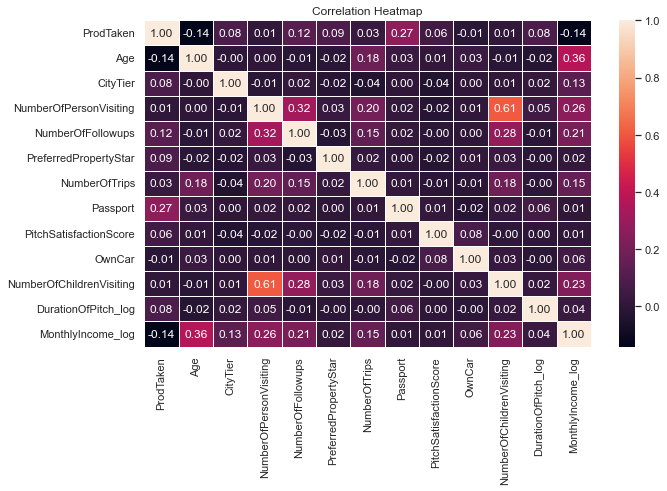

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(clean_data[num_cols].corr(), annot=True, fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()
